<h1 style="color: blue;">다. 여러가지 딥러닝 학습 방법</h1>

<h2 style="color: green;">Pretrained backbone</h2>

Detection, Segmentation 등 고도화된 이미지 처리 인공지능 모델에서, 이미지 특징 추출을 위해 사용되는 Image Classification 모델

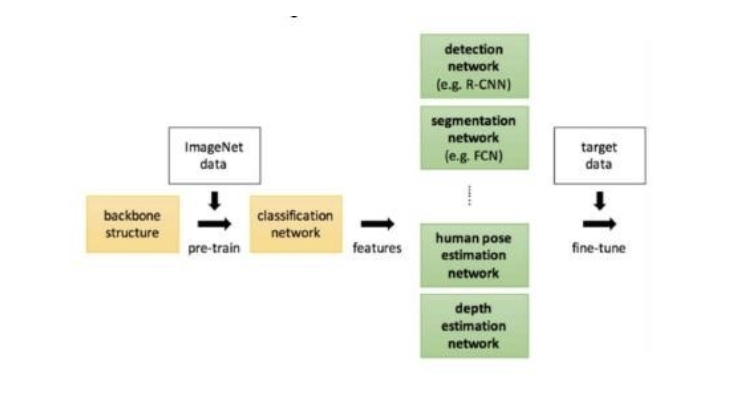

**Pretrained : ImageNet 등 데이터셋에 대해 사전 학습된 모델의 가중치**

### Backbone을 사용하는 이유

모델 학습 이전에 Backbone을 통해 학습유무가 후에 모델 판독 성능 차이에 영향을 준다. 좋은 backbone모델을 사용하면 모델의 정확도가 올라간다. 실제로 ImageNet 기반에서 1~2% 성능 차이가 나는 경우 실제 모델 적용 상황(targettask)에서도 2~3% 이상 성능 차이 발생

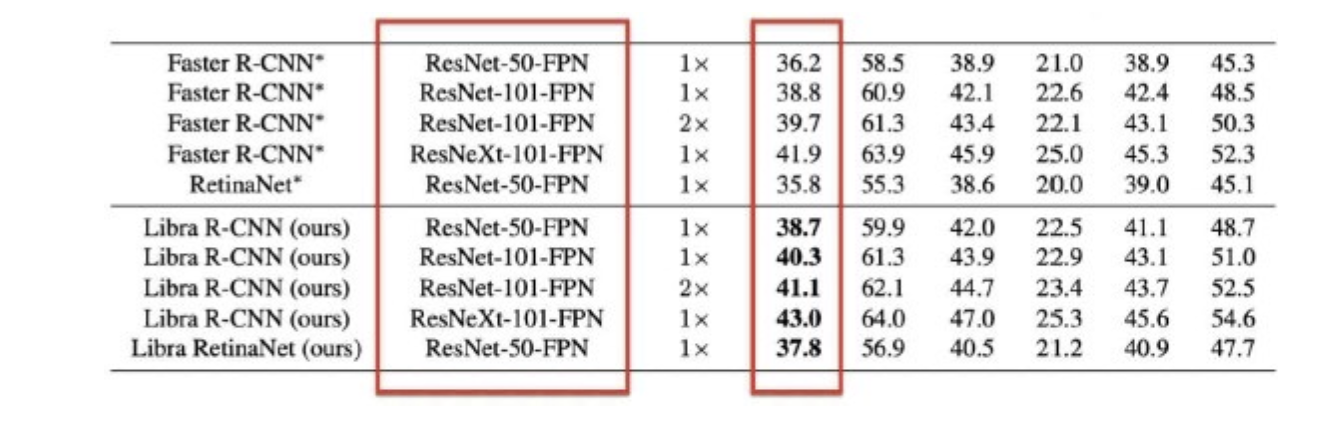

**ResNet-50-FPN, ResNet-101-FPN, ResNeXt-101-FPN 순으로 정확도 향상**

<h2 style="color: green;">Transfer Learning</h2>

전이 학습(Transfer Learning)은 사전에 학습된 모델(원본 모델)을 새로운 작업에 활용하는 기법입니다. 일반적 으로 대규모 데이터셋에서 사전에 학습된 모델은 이미지 인식, 객체 감지, 자연어 처리 등 다양한 작업에서 탁월한 성능을 보여줍니다.

전이 학습은 이러한 사전에 학습된 모델을 가져와서 새로운 작업에 적용하고, 작은 규모의 타겟 데이터셋에 대해 추가적인 학습을 수행하는 방식으로 이루어집니다.

### 전이 학습 주요 아이디어

**원본 모델 전체를 학습에 활용하는 경우**
+ 사전에 학습된 모델 활용 : 대규모 데이터셋에서 사전에 학습된 모델(원본 모델)을 사용합니다. 이러 한 모델은 이미지넷(ImageNet)과 같은 대형 데이터셋에서 사전 학습된 경우가 많습니다. 원본 모델은 이미지의 일반적인 특징을 학습한 특성 추출기로 사용됩니다.
<br></br>
**완전 연결 계층 이전의 모델만 고정하여 새로운 데이터셋에 적용하는 경우**
+ 특성 추출 및 고정 : 원본 모델의 일부 레이어를 가져와서 특성 추출기로 활용합니다. 일반적으로는 원본 모델의 마지막 fully connected layer 이전의 레이어를 선택합니다. 이 레이어들은 이미지의 추상 적인 특징을 포착하는 데에 유용한 정보를 담고 있습니다. 이후, 이 특성 추출기의 가중치를 고정하여 추가적인 학습을 방지합니다.
<br></br>
**원본 모델 이후에 새로운 분류기를 결합하여 사용하는 경우**
+ 새로운 분류기 추가 및 학습: 원본 모델의 특성 추출기 뒤에 새로운 분류기(전결합층, fully connected layer)를 추가합니다. 이 새로운 분류기는 새로운 작업에 대해 필요한 클래스를 분류하기 위한 역할을 합니다. 이 새로운 분류기만을 학습시킵니다. 이 단계에서는 원본 모델의 가중치는 고정되어 있 으므로, 새로운 분류기만을 학습하는 것이 가능합니다.

### Fine tuning

- Transfer learning: Pre-trained model을 가져와 사용하는 것

- Fine tuning: 사전 학습된 가중치를, 사용 목적에 맞도록 업데이트하는 것

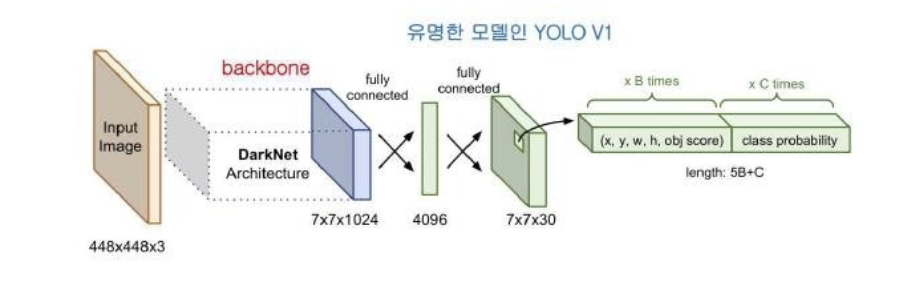

- Object detection의 YOLO v1 모델을 가져와 transfer learning을 진행할 때, 추가된 layer의 가중치를 학습하기 위해 backbone의 가중치를 고정하고 미세 튜닝


- 사전 학습 모델을 자신의 프로젝트에 적합하도록 변형하기 위해, 기존 모델의 Classifier을 적절한 Classifier로 대체함

### Fine tuning의 3가지 전략

1. 전체 모델 새로 학습 : 사전 학습된 모델의 구조를 사용하되, 데이터셋에 맞춰 새로 학습시키는 방법이다. 대규모 데이터셋과 우수한 컴퓨팅 능력이 필요하다.
<br></br>
2. Convolutional base의 일부만 고정하고, 나머지 계층과 Classifier 새로 학습 : 신경망의 가중치 파라미터 중 어느 정도까지 재학습할지 결정해야 함

   + 낮은 라벨 계층: 모든 문제 해결에 있어 보편적인 특징 추출
   + 높은 레벨 계층: 문제에 따라 달라지는 구체적인 특징 추출
    데이터셋이 작은데 많은 레이어를 재학습하는 경우 Overfitting 주의
<br></br>
3. Convolutional base는 고정하고, Classifier만 새로 학습 : Convolutional base는 feature extractor로 계속 사용하고, Classifier만 재학습 시키는 방법이다. 컴퓨팅 연산이 부족하거나 데이터셋이 너무 작은 경우 및 해결하고자 하는 문제와 사전에 학습된 모델이 해결할 수 있는 문제가 매우 비슷한 경우 고려할수있다.

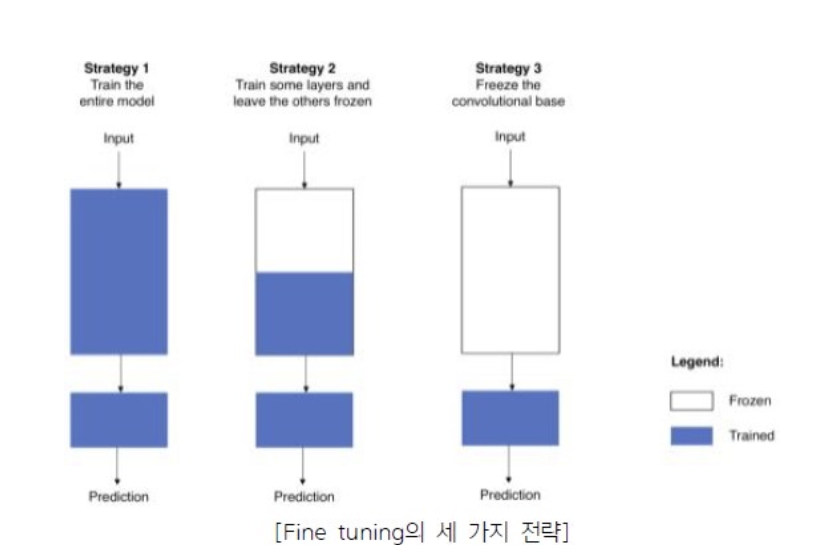

### 전이학습과 파인튜닝의 장점

+ 작은 데이터셋에서도 좋은 성능 : 사전에 학습된 모델은 대규모 데이터셋에서 학습되었기 때문에 이미 다양한 특징을 학습한 상태입니다. 따라서 작은 규모의 데이터셋에서도 높은 성능을 보여줄 수 있습니다.
<br></br>
+ 계산 비용 및 시간 절약 : 사전에 학습된 모델을 사용하면 처음부터 모델을 학습시킬 필요가 없으므로 계산 비용과 시간을 절약할 수 있습니다.
<br></br>
+ 일반화 성능 향상 : 사전에 학습된 모델은 다양한 데이터셋에서 학습되었기 때문에 보다 일반화된 특징을 학습하게 됩니다. 따라서 새로운 작업에 대해 일반화 성능이 향상될 수 있습니다.

## *전이학습 실습*

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader

In [3]:
# Set Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"device info [{device}]")

device info [cpu]


In [3]:
# Load pre-trained model
model = models.resnet50(pretrained=True)

# Freeze model parameters
for param in model.parameters() :
    # 역전파 이후 기울기 조정 False 설정(가중치 고정)
    param.requires_grad = False
    
# Modify the last layer for the number of classes in your new task
num_classes = 10
# 이전 모델에 새로운 layer 추가
model.fc = nn.Linear(in_features=model.fc.in_features, out_features=num_classes)
print(model)

/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
# Load and preprocess the data

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.2,0.2,0.2))
])

train_dataset = torchvision.datasets.CIFAR10(root="../data/", download=True, train=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="../data/", download=True, train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.fc.parameters(), lr=0.001)
# 이전에 학습된 가중치를 보존하기위해서 학습률은 작은 0.001로 설정

model = model.to(device)

In [6]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs) :
    train_loss = 0.0
    # model.train()은 모델을 학습 모드로 설정
    model.train()
    
    for images, labels in train_loader :
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
        
    train_loss /= len(train_loader.dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs}, train_loss {train_loss}")

Epoch 1/5, train_loss 0.7529085339832305
Epoch 2/5, train_loss 0.6256730735397339
Epoch 3/5, train_loss 0.6016084112739563
Epoch 4/5, train_loss 0.5776817907810211
Epoch 5/5, train_loss 0.5715804036617279


In [7]:
# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad() :
    for images, labels in test_loader :
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        # 1을 전달하면 각 행을 따라 최대값을 찾습니다.
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        # (pred == labels)는 예측값과 실제 레이블이 일치하는지를 나타내는 Boolean Tensor
        # (pred == labels).sum()은 True인 요소의 개수
        
acc = 100 * correct / total
print(f"Test acc : {acc:.2f}%")

Test acc : 81.89%
